In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter
import re
import os 
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression, RANSACRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDOneClassSVM, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.datasets import fetch_20newsgroups
from sklearn import metrics
from sklearn.datasets import load_iris, make_circles, make_blobs, make_moons
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs, make_circles, make_regression, make_s_curve, make_swiss_roll
from sklearn.datasets import make_swiss_roll

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.manifold import Isomap, TSNE

from scipy.stats import multivariate_normal

from sklearn.svm import SVC, LinearSVC, NuSVC, OneClassSVM
from sklearn.neighbors import KNeighborsClassifier, KNeighborsTransformer
import xgboost as xgb
# import lightgbm as lgb

from scipy import stats

import geopandas as gpd
import geodatasets
from shapely.geometry import Point
import networkx as nx
import plotly.express as px
import yfinance as yf
import time
import requests

import mlflow


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pydantic\_internal\_fields.py:127: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pydantic\_internal\_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [2]:
sp500 = yf.Ticker("^GSPC")
# sp500 = yf.Ticker("TSLA")

In [3]:
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-18 00:00:00-04:00,4357.350098,4364.200195,4303.839844,4314.600098,3686030000,0.0,0.0
2023-10-19 00:00:00-04:00,4321.359863,4339.540039,4269.689941,4278.000000,3969730000,0.0,0.0
2023-10-20 00:00:00-04:00,4273.850098,4276.560059,4223.029785,4224.160156,4004030000,0.0,0.0


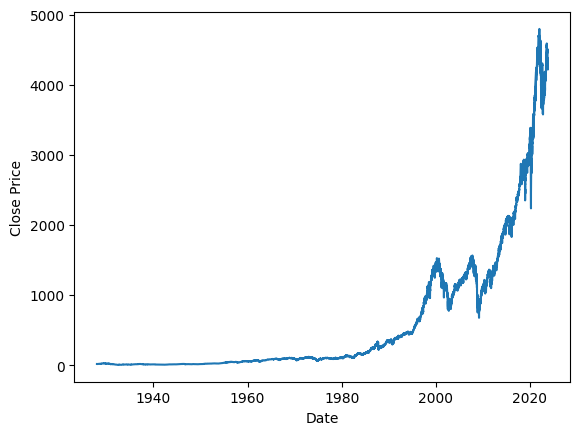

In [4]:
plt.plot(sp500.index, sp500["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


In [5]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000


In [6]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000,0


In [7]:
sp500 = sp500.loc["1990-01-01":]
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0.0,0.0,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0.0,0.0,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0.0,0.0,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0.0,0.0,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0.0,0.0,349.619995,0


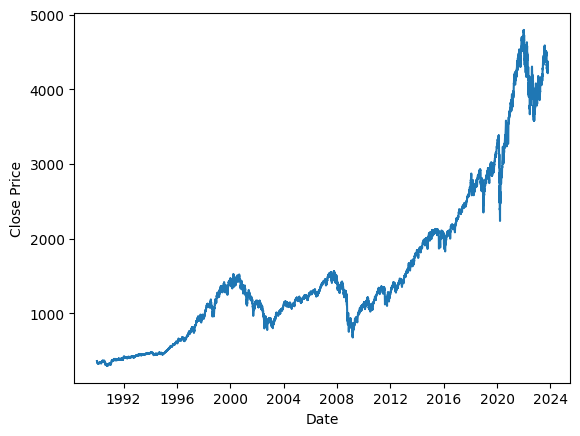

In [8]:
plt.plot(sp500.index, sp500["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [9]:
random_forest_model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)

In [10]:
min_max_scaler = MinMaxScaler()

sp500 = pd.DataFrame(min_max_scaler.fit_transform(sp500), columns=sp500.columns)

In [11]:
train = sp500.iloc[:-90]
test = sp500.iloc[-90:]
predictors = ["Close", "Volume", "Open", "High", "Low"]
random_forest_model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=42)

In [12]:
train.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
8419,0.875029,0.883124,0.879829,0.885763,0.388802,0.0,0.0,0.883857,0.0
8420,0.884340,0.885030,0.885583,0.883857,0.332857,0.0,0.0,0.886092,1.0
8421,0.881756,0.882606,0.884752,0.886092,0.348855,0.0,0.0,0.882464,0.0
8422,0.884890,0.885010,0.884946,0.882464,0.396099,0.0,0.0,0.888332,1.0
8423,0.881168,0.884749,0.884301,0.888332,0.334031,0.0,0.0,0.889427,1.0
8424,0.889194,0.890197,0.891130,0.889427,0.330520,0.0,0.0,0.898329,1.0
8425,0.889957,0.894073,0.893955,0.898329,0.344413,0.0,0.0,0.905012,1.0
8426,0.899780,0.901874,0.903973,0.905012,0.373194,0.0,0.0,0.905807,1.0
8427,0.902814,0.905516,0.901419,0.905807,0.371161,0.0,0.0,0.917638,1.0
8428,0.902601,0.916005,0.906936,0.917638,0.364578,0.0,0.0,0.914028,0.0


In [13]:
preds = random_forest_model.predict(test[predictors])

In [14]:
preds = pd.Series(preds, index=test.index)
preds.head()

8429    0.0
8430    1.0
8431    1.0
8432    1.0
8433    0.0
dtype: float64

In [15]:
precision_score(test["Target"], preds)

0.45454545454545453

In [16]:
combined = pd.concat([test["Target"], preds], axis=1)

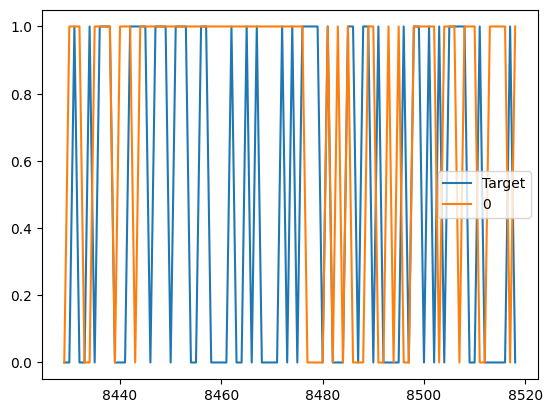

In [17]:
combined.plot()
plt.show()

In [18]:
def predict(train, test, predictors, random_forest_model):
    random_forest_model.fit(train[predictors], train["Target"])
    preds = random_forest_model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [19]:
def backtest(data, random_forest_model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, random_forest_model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [20]:
predictions = backtest(sp500, random_forest_model, predictors)


In [21]:
predictions["Predictions"].value_counts()


Predictions
0.0    3320
1.0    2699
Name: count, dtype: int64

In [22]:
precision_score(predictions["Target"], predictions["Predictions"])


0.530196369025565

In [23]:
predictions["Target"].value_counts() / predictions.shape[0]


Target
1.0    0.533311
0.0    0.466689
Name: count, dtype: float64

In [24]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [25]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])
sp500.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
1000,0.037764,0.036454,0.037443,0.037235,0.024009,0.0,0.0,0.036964,0.0,0.992186,1.0,0.990708,1.0,1.000783,32.0,1.081521,127.0,1.705486,512.0
1001,0.037172,0.035916,0.037304,0.036964,0.028960,0.0,0.0,0.037298,1.0,0.996347,0.0,0.988698,1.0,0.992620,32.0,1.073079,126.0,1.691298,512.0
1002,0.036906,0.035980,0.037309,0.037298,0.024844,0.0,0.0,0.037973,1.0,1.004488,1.0,0.998608,2.0,1.000858,32.0,1.082121,127.0,1.704680,513.0
1003,0.037234,0.036512,0.037639,0.037973,0.031751,0.0,0.0,0.037855,0.0,1.008973,2.0,1.013736,3.0,1.018108,32.0,1.100976,128.0,1.733539,514.0
1004,0.037908,0.036627,0.038127,0.037855,0.022337,0.0,0.0,0.037733,0.0,0.998447,1.0,1.010413,2.0,1.014124,32.0,1.096804,128.0,1.726201,513.0


In [26]:
random_forest_model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [27]:
def predict(train, test, predictors, random_forest_model):
    random_forest_model.fit(train[predictors], train["Target"])
    preds = random_forest_model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.55] = 1
    preds[preds < 0.55] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [29]:
predictions = backtest(sp500, random_forest_model, new_predictors)
predictions


,Target,Predictions
3500,0.0,1.0
3501,0.0,1.0
3502,1.0,1.0
3503,0.0,1.0
3504,1.0,1.0
...,...,...
8514,0.0,0.0
8515,0.0,0.0
8516,0.0,0.0
8517,1.0,1.0


In [30]:
predictions["Predictions"].value_counts()


Predictions
0.0    3083
1.0    1936
Name: count, dtype: int64

In [31]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5650826446280992

In [32]:
predictions["Target"].value_counts() / predictions.shape[0]


Target
1.0    0.542937
0.0    0.457063
Name: count, dtype: float64

In [33]:
predictions.tail(15)

,Target,Predictions
8504,0.0,1.0
8505,1.0,1.0
8506,1.0,1.0
8507,1.0,0.0
8508,1.0,0.0
8509,0.0,0.0
8510,0.0,1.0
8511,1.0,1.0
8512,0.0,1.0
8513,0.0,1.0
